In [1]:
import pandas as pd
import numpy as np

url = '.\대출금리\개인사업자 대출\기업대출금리(대물담보-개인사업자).csv'
class read():
    credit_distribution = pd.read_csv('.\개인사업자신용등급분포.csv', encoding='cp949')
    cd = np.array(credit_distribution['구성 비율']).astype('float')
    

    def __init__(self,url):
        self.loan_dev = url

    def tidy(self):
        self.loan_dev = pd.read_csv(self.loan_dev,encoding='cp949')
        self.loan_dev['은행'] = self.loan_dev['은행'].str.strip()
        self.loan_dev.columns = ['은행','구분','1~3등급','4등급','5등급','6등급','7~10등급','평균금리','참고사항']
        self.loan_dev.drop([0],axis=0,inplace=True)
        self.loan_dev.drop(['참고사항','구분'],axis=1,inplace=True)
        self.loan_dev['평균금리']=self.loan_dev['평균금리'].replace('-',np.NaN)
        self.loan_dev.dropna(axis=0,inplace=True)
        self.loan_dev.reset_index(drop=True,inplace=True)
        self.loan_dev.replace('-',0,inplace=True)
        self.interest_grade = self.loan_dev.loc[:,'1~3등급':'7~10등급']
        return self.loan_dev

    def multi(self):
        self.a = []
        for i in range(len(self.interest_grade)):
            self.rate_grade = np.array(self.interest_grade.loc[i:i,'1~3등급':'7~10등급'], dtype='float')[0]
            #은행 상품 단위 신용 등급 별 이자율
            self.boolean = self.rate_grade.astype('bool')
            #상품의 대상 고객 
            self.ac_cd = sum(self.boolean * self.cd)
            # 전체 신용 등급 대비 타겟 고객 비율
            self.customer_ration = self.cd / self.ac_cd
            # 타겟 고객 대비 특정 신용 등급 고객 비율
            self.real_income = self.rate_grade @ self.customer_ration
            # 대출 금리에 대한 실제 고객의 가중 평균으로 구한 상품 수익률
            self.a.append(self.real_income)
        
        self.loan_dev['가중평균수익'] = self.a
        return self.loan_dev


a = read(url)
a.tidy()
a.multi()

C:\Users\LG\AppData\Local\Temp\ipykernel_6844\2185068206.py:35: RuntimeWarning: divide by zero encountered in true_divide
  self.customer_ration = self.cd / self.ac_cd
C:\Users\LG\AppData\Local\Temp\ipykernel_6844\2185068206.py:37: RuntimeWarning: invalid value encountered in matmul
  self.real_income = self.rate_grade @ self.customer_ration


,은행,1~3등급,4등급,5등급,6등급,7~10등급,평균금리,가중평균수익
0,BNK경남은행,3.79,3.75,4.22,0,5.22,3.53,3.949037
1,BNK부산은행,3.37,3.66,3.95,4.09,4.52,3.35,3.641142
2,DGB대구은행,3.50,3.59,4.03,4.10,4.77,3.47,3.736607
3,IBK기업은행,3.18,3.15,3.23,3.29,3.36,3.25,3.209613
4,KB국민은행,3.32,3.52,4.55,5.24,5.42,3.37,3.894281
5,KDB산업은행,0,0,0,0,0,2.54,NaN
6,NH농협은행,3.52,3.78,3.97,4.47,5.15,3.49,3.827712
7,SH수협은행,3.33,3.30,3.73,0,0,3.63,3.398323
8,광주은행,3.64,3.70,3.88,4.08,4.82,3.78,3.805166
9,스탠다드차타드은행,0,3.09,3.09,3.32,3.45,3.15,3.211201


C:\Users\LG\AppData\Local\Temp\ipykernel_11484\1461895773.py:35: RuntimeWarning: divide by zero encountered in true_divide
  self.customer_ration = self.cd / self.ac_cd
C:\Users\LG\AppData\Local\Temp\ipykernel_11484\1461895773.py:37: RuntimeWarning: invalid value encountered in matmul
  self.real_income = self.rate_grade @ self.customer_ration
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(b

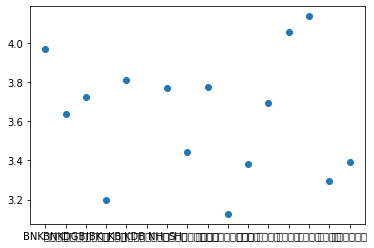

In [8]:
import matplotlib.pyplot as plt
x = a.multi()['은행']
y = a.multi()['가중평균수익']

plt.scatter(x,y)
plt.show()